In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
# Load the dataset
df = pd.read_csv('/content/Obesity.csv')

Exploratory Data Analysis

In [4]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [5]:
# Descriptive statistics summary
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
# Check for missing values
df.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [7]:
#Handle missing values (Dropping missing values)
df=df.dropna()

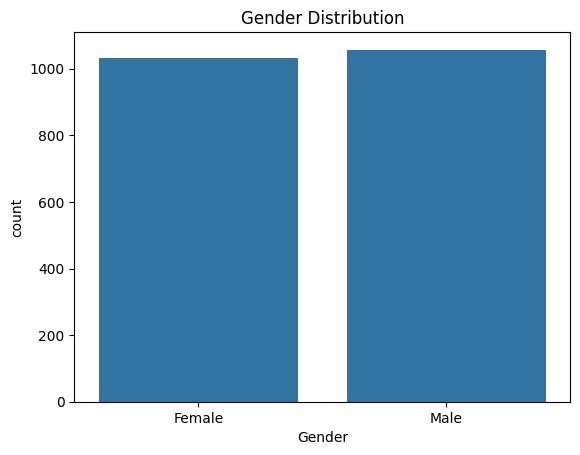

In [12]:
# Count plot for 'Gender'
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

<ipython-input-13-9b71175666e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


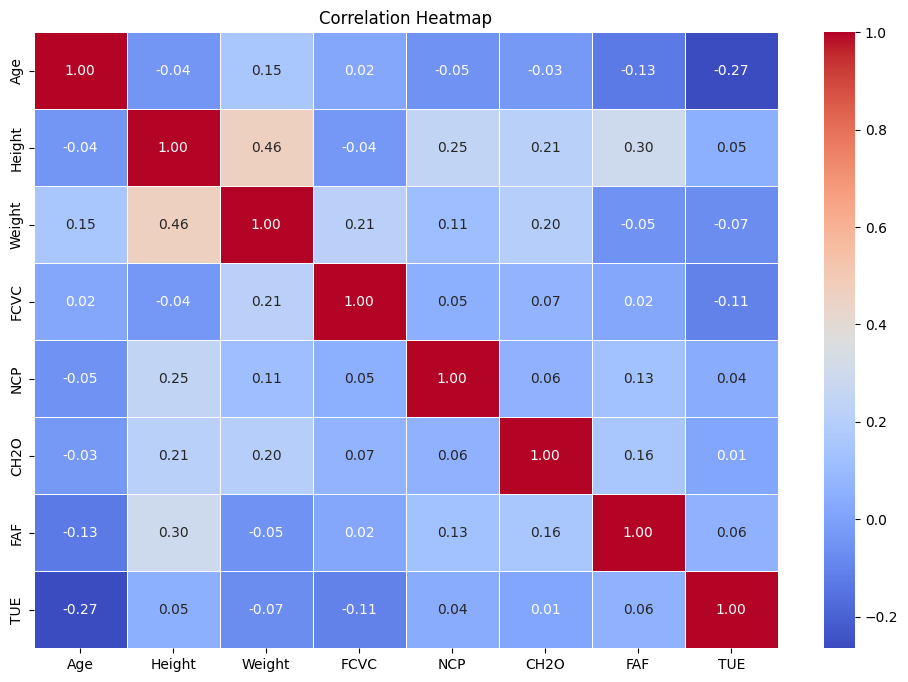

In [13]:
# Correlation heatmap for numerical columns
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

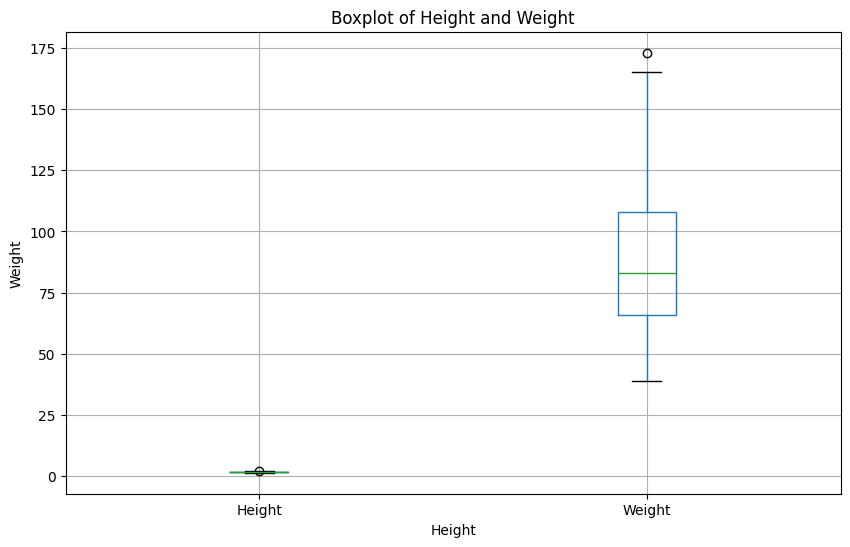

In [14]:
# Boxplot for Height, Weight
plt.figure(figsize=(10, 6))
df.boxplot(column=['Height', 'Weight'])
plt.title('Boxplot of Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

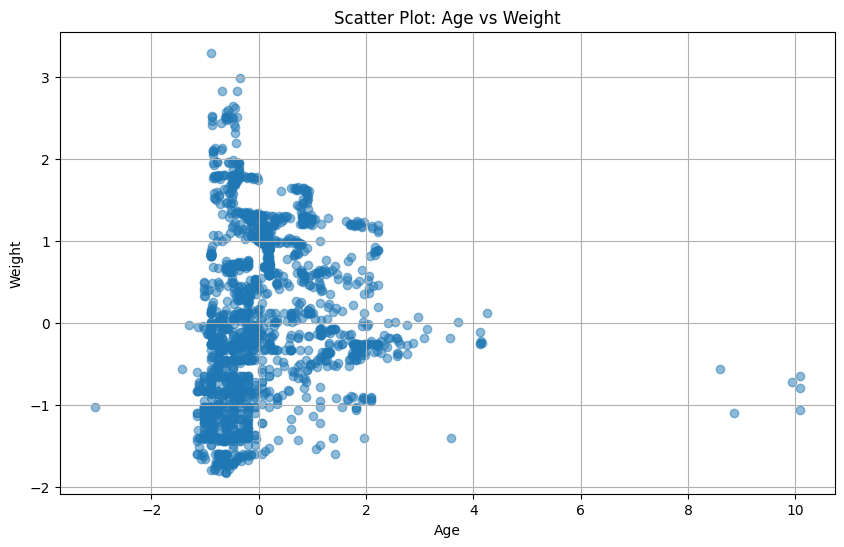

In [33]:
#scatter plot for Age and Weight
x='Age'
y='Weight'
plt.figure(figsize=(10, 6))
plt.scatter(df[x], df[y], alpha=0.5)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.xlabel(x)
plt.ylabel(y)
plt.grid(True)
plt.show()

In [15]:
#Encoding
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

In [18]:
# Normalization/Standardization for numerical variables
scaler = StandardScaler()
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [20]:
# Split the dataset
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model selection and training (using SVM)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [24]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9593301435406698
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        52
      Normal_Weight       0.94      0.90      0.92        51
     Obesity_Type_I       0.97      0.95      0.96        77
    Obesity_Type_II       0.95      0.98      0.96        55
   Obesity_Type_III       1.00      1.00      1.00        70
 Overweight_Level_I       0.95      0.91      0.93        57
Overweight_Level_II       0.95      0.96      0.96        56

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.96      0.96      0.96       418

[[52  0  0  0  0  0  0]
 [ 3 46  0  0  0  2  0]
 [ 0  0 73  3  0  0  1]
 [ 0  0  1 54  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  3  0  0  0 52  2]
 [ 0  0  1  0  0  1 54]]


In [29]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_model = grid_search.best_estimator_


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [30]:
#Cross Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.97313433 0.93731343 0.96107784 0.98502994 0.95808383]


In [31]:
#Feature Engineering
if best_params['kernel'] == 'linear':
    feature_importance = best_model.coef_
    print(f'Feature Importance: {feature_importance}')

Feature Importance: [[-3.60775311e-02  2.81633743e+00 -1.36007836e+01  3.79615368e-01
   1.74541713e-01  1.65518103e-01  2.94388418e-02 -6.38199003e-02
   9.44947368e-02 -9.44947368e-02 -1.43654694e-01  1.43654694e-01
  -6.52341491e-02  6.52341491e-02 -3.62797979e-01  4.24965165e-01
   1.96947079e-01 -2.59114265e-01 -5.68434189e-14  0.00000000e+00
   3.96378336e-01 -3.96378336e-01  0.00000000e+00  8.08051675e-01
  -2.27342093e-01 -5.80709583e-01  4.96630341e-01 -3.95657436e-01
   0.00000000e+00 -1.00972905e-01  0.00000000e+00]
 [-1.36985373e-01  2.60773020e-01 -1.48302356e+00 -1.97427826e-02
   4.58488483e-02  8.27731610e-02  9.96539171e-03  2.71720581e-02
  -4.42322727e-02  4.42322727e-02  6.47715205e-02 -6.47715205e-02
   0.00000000e+00  0.00000000e+00 -9.40098659e-02  2.34394415e-01
  -1.40384549e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.70981050e-02 -2.70981050e-02  6.77163936e-02  0.00000000e+00
   0.

In [32]:
#Model Evaluation and Adjustment
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[52  0  0  0  0  0  0]
 [ 3 46  0  0  0  2  0]
 [ 0  0 73  3  0  0  1]
 [ 0  0  1 54  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  3  0  0  0 52  2]
 [ 0  0  1  0  0  1 54]]
